In [2]:
# 파이토치 호출
import torch
import torch.nn as nn

# 토치비전 transform 및 데이터셋 가져오기
from torchvision.transforms import transforms
from torchvision.datasets import STL10

# 데이터 로더 가져오기
from torch.utils.data.dataloader import DataLoader

# 최적화 알고리즘 가져오기
from torch.optim import optimizer

# numpy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt

In [3]:
# 시드 고정
torch.manual_seed(1)
torch.cuda.manual_seed(1)
torch.cuda.manual_seed_all(1)
np.random.seed(1)

In [4]:
# 데이터 transform 적용
# 해상도는 논문에서 사용한 224*224 해상도 적용
# transforms.Compose를 사용하여 여러 transform을 적용할 수 있음
data_transforms = transforms.Compose([
    transforms.Resize((224,224)), # 224*224로 크기 조정
    transforms.RandomHorizontalFlip(0.5), # 50% 확률로 좌우 반전
    transforms.ToTensor(), # 텐서로 변환
    transforms.Normalize((0.44671392, 0.43981278, 0.40664902), (0.061943434, 0.061971385, 0.06911716)) # 표준화를 원할 경우,
])

In [5]:
# 데이터 불러오기(fashion MNIST 사용)
path = '/home/xogns5037/딥러닝코딩스터디/data/STL10'

train_data = STL10(
    root = path,
    split= 'train',
    download=False,
    transform=data_transforms
)

test_data = STL10(
    root = path,
    split='test',
    download=False,
    transform=data_transforms
)

In [6]:
# 이미지 정규화
imgs = np.array([img.numpy() for img, _ in train_data])
print(f'img shape : {imgs.shape}')

img shape : (5000, 3, 224, 224)


In [7]:
min_r = np.min(imgs, axis=(2,3))[:, 0].min()
min_g = np.min(imgs, axis=(2,3))[:, 1].min()
min_b = np.min(imgs, axis=(2,3))[:, 2].min()

max_r = np.max(imgs, axis=(2,3))[:, 0].max()
max_g = np.max(imgs, axis=(2,3))[:, 1].max()
max_b = np.max(imgs, axis=(2,3))[:, 2].max()

mean_r = np.mean(imgs, axis=(2,3))[:, 0].mean()
mean_g = np.mean(imgs, axis=(2,3))[:, 1].mean()
mean_b = np.mean(imgs, axis=(2,3))[:, 2].mean()

std_r = np.std(imgs, axis=(2,3))[:, 0].std()
std_g = np.std(imgs, axis=(2,3))[:, 1].std()
std_b = np.std(imgs, axis=(2,3))[:, 2].std()

In [8]:
# 표준화 이전
# STL10 데이터의 경우 정규화가 이미 잘 되어있는 데이터
# 표준화가 나을지 정규화가 나을지는 직접 확인하며 작업해야함
print(f'min : {min_r, min_g, min_b}')
print(f'max : {max_r, max_g, max_b}')
print(f'mean : {mean_r, mean_g, mean_b}')
print(f'std : {std_r, std_g, std_b}')

min : (-7.2116427, -7.09703, -5.8834743)
max : (8.932118, 9.03945, 8.584714)
mean : (-2.6016235e-07, 1.953125e-07, -1.9073487e-07)
std : (1.0, 1.0, 1.0)


In [9]:
# 표준화 이후
# STL10 데이터의 경우 정규화가 이미 잘 되어있는 데이터
# 표준화가 나을지 정규화가 나을지는 직접 확인하며 작업해야함
print(f'min : {min_r, min_g, min_b}')
print(f'max : {max_r, max_g, max_b}')
print(f'mean : {mean_r, mean_g, mean_b}')
print(f'std : {std_r, std_g, std_b}')

min : (-7.2116427, -7.09703, -5.8834743)
max : (8.932118, 9.03945, 8.584714)
mean : (-2.6016235e-07, 1.953125e-07, -1.9073487e-07)
std : (1.0, 1.0, 1.0)


In [10]:
# batch size 및 num_workers 구성
batch_size = 128
num_workers = 4  # 4개의 프로세스를 사용하여 데이터를 불러옴

train_dataloader = DataLoader(
    train_data,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    drop_last=True
    )

test_dataloader = DataLoader(
    test_data,
    batch_size=batch_size,
    shuffle=False,
    num_workers=num_workers,
    drop_last=True)

In [11]:
(train_dataloader.dataset)

Dataset STL10
    Number of datapoints: 5000
    Root location: /home/xogns5037/딥러닝코딩스터디/data/STL10
    Split: train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.44671392, 0.43981278, 0.40664902), std=(0.061943434, 0.061971385, 0.06911716))
           )

In [12]:
# 데이터 확인
print(f'train data 개수 : {len(train_dataloader.dataset)}')
print(f'test data 개수 : {len(test_dataloader.dataset)}')

for x, y in test_dataloader:
    print(f'x shape (N, C, H, W): {x.shape}')
    print(f'y shape : {y.shape, y.dtype}')
    break

train data 개수 : 5000
test data 개수 : 8000
x shape (N, C, H, W): torch.Size([128, 3, 224, 224])
y shape : (torch.Size([128]), torch.int64)


In [13]:
# 데이터 클래스 확인
classes = train_dataloader.dataset.classes
classes

['airplane',
 'bird',
 'car',
 'cat',
 'deer',
 'dog',
 'horse',
 'monkey',
 'ship',
 'truck']

(3, 96, 96)


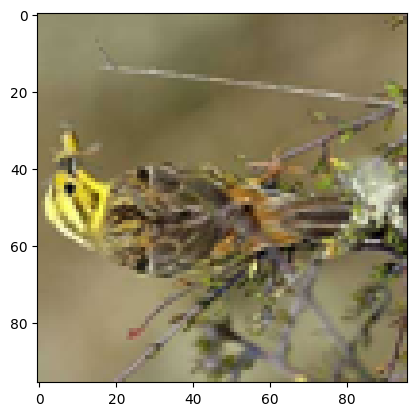

In [14]:
# 데이터 이미지 확인

# size 확인
print(train_dataloader.dataset.data[1].shape) # 3, 96, 96

# 이미지 출력
plt.imshow(train_dataloader.dataset.data[0].T) # plt 는 가로, 세로, 채널을 받기 때문에 "T"로 전환

In [15]:
class VGG11(nn.Module):
    def __init__(self):
        super(VGG11, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # after Flatten
        self.fc1 = nn.Sequential(
            nn.Linear(in_features=512 * 7 * 7, out_features=4096),
            nn.ReLU(),
        )

        self.fc2 = nn.Sequential(
            nn.Linear(in_features= 4096, out_features=4096),
            nn.ReLU()
        )

        self.fc3 = nn.Sequential(
            nn.Linear(in_features=4096, out_features=10),
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)

        x = torch.flatten(input=x, start_dim=1)

        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)

        return x

In [16]:
class VGG16(nn.Module): # 논문에서 Configuration D에 해당하는 16층짜리
    def __init__(self):
        super(VGG16, self).__init__()

        # 최초 input : 224 * 224 * 3
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1,),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        ) # layer1 이후 : 112 * 112 * 64


        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        ) # layer2 이후 : 56 * 56 * 128


        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        ) # layer3 이후 : 28 * 28 * 256

        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        ) # layer4 이후 : 14 * 14 * 512)

        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        ) # layer5 이후 : 7 * 7 * 512

        # after Flatten
        self.fc1 = nn.Sequential(
            nn.Linear(in_features=7*7*512, out_features=4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5)
        )

        self.fc2 = nn.Sequential(
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5)

        )

        self.fc3 = nn.Sequential(
            nn.Linear(in_features=4096, out_features=10),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)

        # x = torch.flatten(input=x, start_dim=1)
        x = x.view(x.size(0), -1)

        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)

        return x

In [17]:
# model = VGG11()
model = VGG16()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')
model.to(device)

Using cuda device


VGG16(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): MaxPool

In [18]:
from torchsummary import summary
# model = VGG11()
model = VGG16()
summary(model, input_size=(3,224,224), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [19]:
# torch summary 없이 간편한 확인을 원한다면
param = list(model.parameters())

print(len(param))
for i in param:
    print(i.shape)

32
torch.Size([64, 3, 3, 3])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([128, 64, 3, 3])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([256, 128, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([512, 256, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([4096, 25088])
torch.Size([4096])
torch.Size([4096, 4096])
torch.Size([4096])
torch.Size([10, 4096])
torch.Size([10])


In [20]:
criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

criterion.to(device=device)
model.to(device=device)

VGG16(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): MaxPool

In [21]:
# 학습
num_epochs = 100 # 에폭 설정

for epoch in range(num_epochs):
    running_loss = 0.0

    for i, data in enumerate(train_dataloader):
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        #Forward pass
        outputs = model(images) # 모델 예측 시행
        loss = criterion(outputs, labels) # 예측에 따른 손실 계산 및 출력

        # backward pass
        optimizer.zero_grad() # 가중치 변화를 0으로 만들고
        loss.backward() # 역전파를 수행하고
        optimizer.step() # 가중치를 갱신

        running_loss += loss.item()
        # 100번에 한번씩 loss 출력
        if i % 19 == 18:
            print(f'Training epoch : {epoch+1}, [{i * len(images)} / {len(train_dataloader.dataset)}] ({100 * i / len(train_dataloader):0.0f}%), Loss : {running_loss/19:0.6f}')
            running_loss = 0.0

print('학습종료!')

Training epoch : 1, [2304 / 5000] (46%), Loss : 2.303123
Training epoch : 1, [4736 / 5000] (95%), Loss : 2.301453
Training epoch : 2, [2304 / 5000] (46%), Loss : 2.302476
Training epoch : 2, [4736 / 5000] (95%), Loss : 2.301985
Training epoch : 3, [2304 / 5000] (46%), Loss : 2.299883
Training epoch : 3, [4736 / 5000] (95%), Loss : 2.297969
Training epoch : 4, [2304 / 5000] (46%), Loss : 2.301089
Training epoch : 4, [4736 / 5000] (95%), Loss : 2.302691
Training epoch : 5, [2304 / 5000] (46%), Loss : 2.302581
Training epoch : 5, [4736 / 5000] (95%), Loss : 2.302586
Training epoch : 6, [2304 / 5000] (46%), Loss : 2.302576
Training epoch : 6, [4736 / 5000] (95%), Loss : 2.302496
Training epoch : 7, [2304 / 5000] (46%), Loss : 2.302092
Training epoch : 7, [4736 / 5000] (95%), Loss : 2.302585
Training epoch : 8, [2304 / 5000] (46%), Loss : 2.302585
Training epoch : 8, [4736 / 5000] (95%), Loss : 2.302624
Training epoch : 9, [2304 / 5000] (46%), Loss : 2.302585
Training epoch : 9, [4736 / 500

In [22]:
# test
model.eval() # drop out 같은 학습에만 필요하고 test에는 불필요한 층을 비활성화

# 클래스 개수대로 정답 개수, 총 개수 구하기
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


with torch.no_grad(): # gradient 연산을 멈춘 상태로 계산, 메모리 절약 및 연산속도 증가
    for data in test_dataloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        # 결과 예측
        outputs = model(images) # 모델 실행

        # 이미지가 가질 수 있는 라벨 중 가장 높은 확률과 인덱스(라벨)를 출력
        _, predicted = torch.max(outputs.data, dim=1)

        # 라벨과 정답이 일치하는지 확인
        c = (predicted == labels).squeeze()

        # 한번에 배치 사이즈만큼 예측하기 때문에 batch_size 개수만큼 예측 결과가 나옴
        for i in range(test_dataloader.batch_size):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

In [23]:
# test 결과 확인
total_correct = 0
total = 0

for i in range(10):
    total_correct += class_correct[i]
    total += class_total[i]
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

print(f'Total accuracy : {100 * total_correct/total:0.2f}%')

Accuracy of airplane : 100 %
Accuracy of  bird :  0 %
Accuracy of   car :  0 %
Accuracy of   cat :  0 %
Accuracy of  deer :  0 %
Accuracy of   dog :  0 %
Accuracy of horse :  0 %
Accuracy of monkey :  0 %
Accuracy of  ship :  0 %
Accuracy of truck :  0 %
Total accuracy : 10.01%
